<a href="https://colab.research.google.com/github/JenFaith/Skilled_Nursing_Facility/blob/main/Skilled_Nursing_Home_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Nursing Home Data Analysis**

##Importing Data & Packages

In [1]:
%%capture
import sys
if 'google.colab' in sys.modules:
    !pip install category_encoders==2.*
    !pip install pdpbox
    !pip install shap


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from functools import reduce
import seaborn as sns

In [ ]:
outcomes_14 = pd.read_csv('QualityMsr_Download_14.csv')
outcomes_15 = pd.read_csv('QualityMsr_Download_15.csv')
outcomes_16 = pd.read_csv('QualityMsrClaims_Download_16.csv')
outcomes_17 = pd.read_csv('QualityMsrClaims_Download_17.csv',encoding='cp1252')
outcomes_18 = pd.read_csv('QualityMsrClaims_Download_18.csv', encoding='cp1252')
outcomes_19 = pd.read_csv('QualityMsrClaims_Download_19.csv', encoding='cp1252')
outcomes_20 = pd.read_csv('NH_QualityMsr_Claims_Nov2020.csv',encoding='cp1252')

In [3]:
#MEDICARE FILES

medicare_2018 = pd.read_csv('Skilled_Nursing_Facility_Provider_by_RUG_Table__CY_2018.csv')
medicare_2017 = pd.read_csv('Skilled_Nursing_Facility_Provider_by_RUG_Table__CY_2017.csv')
medicare_2016 = pd.read_csv('Skilled_Nursing_Facility_Provider_by_RUG_Table__CY_2016.csv')
medicare_2015 = pd.read_csv('Skilled_Nursing_Facility_Provider_by_RUG_Table__CY_2015.csv')
medicare_2014 = pd.read_csv('Skilled_Nursing_Facility_Provider_by_RUG_Table__CY_2014.csv')
medicare_2013 = pd.read_csv('Skilled_Nursing_Facility_Provider_by_RUG_Table__CY_2013.csv')

In [8]:
#FACILITY INFORMATION FILES
facility_info_19 = pd.read_csv('ProviderInfo_Download_19.csv', encoding='cp1252',parse_dates = ['FILEDATE', 'PARTICIPATION_DATE'])
facility_info_18 = pd.read_csv('ProviderInfo_Download_18.csv', encoding='cp1252', parse_dates = ['FILEDATE', 'PARTICIPATION_DATE'])
facility_info_17 = pd.read_csv('ProviderInfo_Download_17.csv', encoding='cp1252',parse_dates = ['FILEDATE', 'PARTICIPATION_DATE'])
facility_info_16 = pd.read_csv('ProviderInfo_Download_16.csv', encoding='cp1252',parse_dates = ['FILEDATE', 'PARTICIPATION_DATE'])
facility_info_15 = pd.read_csv('ProviderInfo_Download_15.csv', encoding='cp1252',parse_dates = ['FILEDATE', 'PARTICIPATION_DATE'])
facility_info_14 = pd.read_csv('ProviderInfo_Download_14.csv', encoding='cp1252',parse_dates = ['FILEDATE', 'PARTICIPATION_DATE'])

In [9]:
#OVERVIEW FILES
sample_2020 = pd.read_csv('NH_SurveySummary_Nov2020.csv', encoding='cp1252')
sample_2020.drop(columns='Inspection Cycle', inplace=True)
sample_2019 = pd.read_csv('SurveySummary_Download-19.csv', encoding='cp1252', parse_dates = ['FILEDATE', 'H_SURVEY_DATE', 'F_SURVEY_DATE'])
sample_2018 = pd.read_csv('SurveySummary_Download_18.csv', encoding='cp1252', parse_dates = ['FILEDATE', 'H_SURVEY_DATE', 'F_SURVEY_DATE'])
sample_2018.drop(columns='HLTHSRVY_POST20171128', inplace=True)
sample_2015 = pd.read_csv('SurveySummary_Download_15.csv', encoding='cp1252', parse_dates = ['filedate', 'H_SURVEY_DATE', 'F_SURVEY_DATE'])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,14,16,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [108]:
payments_percent = pd.read_csv('FY_2021_SNF_VBP_Facility_Performance.csv', encoding='cp1252')

##Important Chart Definitions

**AIDHRD** - Reported CNA Staffing Hours per Resident per Day

**VOCHRD** - Reported LPN Staffing Hours per Resident per Day

**RNHRD** - Reported RN Staffing Hours per Resident per Day

**TOTLICHRD** - Reported Licensed Staffing Hours per Resident per Day

**TOTHRD** - Reported Total Nurse Staffing Hours per Resident per Day

**PTHRD** - Reported Physical Therapist Staffing Hours per Resident Per Day

**CHOW_LAST_12MOS** - Changed ownership in last 12 months



#I. WRANGLE DATA

##*FORMATTING OUTCOMES MEASUREMENTS*

I realized that I can't actually use this since the measures aren't identical but I didn't want to totally trash the code.

In [10]:
#outcomes_20.drop(columns='Location', inplace=True)

In [11]:
# def outcomes_n(df):
  
#   #Standardize List Names
#   list_c = ['PROVNUM', 'PROVNAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'MSR_CD',
#        'MSR_DESCR', 'STAY_TYPE', 'SCORE_ADJUSTED', 'SCORE_OBSERVED',
#        'SCORE_EXPECTED', 'SCORE_FN', 'FIVE_STAR_MSR', 'MEASURE_PERIOD',
#        'FILEDATE']
#   df.columns = list_c

#   #Reformat spreadsheet so each score has it's own column
#   df['REHOSPITALIZED_ADJ'] = np.where(df['MSR_DESCR'].str.contains('rehospitalized'),df['SCORE_ADJUSTED'], 0)
#   df['OUT_EMERGENCY_ADJ'] = np.where(df['MSR_DESCR'].str.contains('outpatient'), df['SCORE_ADJUSTED'], 0)
#   df['SUCCESS_ADJ'] = np.where(df['MSR_DESCR'].str.contains('successfully'), df['SCORE_ADJUSTED'], 0)

#   #Add column to indicate year data is form
#   df['YEAR']=df['MEASURE_PERIOD'].astype(str).str[:4]

#   #Only keep needed columns
#   df.drop(columns=['MSR_CD','MSR_DESCR', 'SCORE_ADJUSTED', 'SCORE_OBSERVED', 'SCORE_EXPECTED',
#        'SCORE_FN', 'FIVE_STAR_MSR','FILEDATE','MEASURE_PERIOD'], inplace=True)

#   #Regroup to push all repeating columns into 1
#   df = df.groupby(['PROVNUM', 'PROVNAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'YEAR']).sum().reset_index()

#   return df

##*Standardizing Facility Reports & Engineering New Features*

In [12]:
def facility_wrangle(df):
  #Format all column titles the same
  df.columns = df.columns.str.upper()
  
  #Add new column with just year of survey
  year = pd.DatetimeIndex(df['FILEDATE']).year.tolist()
  y_dict = {"YEAR":year}
  years_col = pd.DataFrame(y_dict)
  df = pd.concat([df, years_col], axis=1)

  #Add new column telling legth of time certified to participate in Medicare/Medicaid program
  df['CERT_LENGTH_YRS'] = df['FILEDATE'] - df['PARTICIPATION_DATE']
  df['CERT_LENGTH_YRS'] = (df['CERT_LENGTH_YRS'].dt.days)/365.25
  df['CERT_LENGTH_YRS'] = df['CERT_LENGTH_YRS'].round(1)

  #Add new column to calculate difference in certified beds vs residents
  df['CERTBED_vs_RESTOT'] = df['BEDCERT'] - df['RESTOT']

  #Only keep summary columns
  keep_facil =['PROVNUM','PROVNAME','ADDRESS','CITY','STATE','ZIP','COUNTY_NAME','OWNERSHIP','BEDCERT','RESTOT','CERTIFICATION','CERTBED_vs_RESTOT','CERT_LENGTH_YRS','YEAR',
               'CHOW_LAST_12MOS', 'AIDHRD','VOCHRD','RNHRD', 'TOTLICHRD', 'TOTHRD', 'PTHRD']
  df.drop(df.columns.difference(keep_facil), 1, inplace=True)

  return df
  

APPLYING WRANGLE FUNCTION TO EACH DATASET

In [13]:
facility_info_19 = facility_wrangle(facility_info_19)

In [14]:
facility_info_18 = facility_wrangle(facility_info_18)

In [15]:
facility_info_17 = facility_wrangle(facility_info_17)

In [16]:
facility_info_16 = facility_wrangle(facility_info_16)

In [17]:
facility_info_15 = facility_wrangle(facility_info_15)

In [18]:
facility_info_14 = facility_wrangle(facility_info_14)

##*Standardizing Nursing Home Data & Engineering New Features*



In [19]:
def sample_n(df):
  #Standardize List Names
  list_c = ['PROVNUM', 'PROVNAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'CYCLE', 'H_SURVEY_DATE', 'F_SURVEY_DATE',
       'H_TOT_DFCNCY', 'F_TOT_DFCNCY', 'H_ABS_NEG_EXP_N', 'H_QOC_QOL_N',
       'H_CARE_PLAN_N', 'H_NRS_MD_SVC_N', 'H_RES_RIGHTS_N', 'H_NUTRITION_N',
       'H_PHARMACY_N', 'H_ENVIRONMENTAL_N', 'H_ADMINISTRATION_N',
       'F_EMRGNCY_PREP_N', 'F_SPRINKLER_N', 'F_CONSTRUCTION_N', 'F_SERVICES_N',
       'F_CORRIDOR_DOORS_N', 'F_EGRESS_N', 'F_ELECTRICAL_N',
       'F_EMERGENCY_PLAN_N', 'F_FIRE_ALARM_N', 'F_SMOKE_N', 'F_INTERIOR_N',
       'F_GAS_VAC_ELEC_N', 'F_HAZARD_AREA_N', 'F_ILLUMINATION_N',
       'F_LABORATORIES_N', 'F_MEDICAL_GAS_N', 'F_SMOKING_REG_N',
       'F_MISCELLANEOUS_N', 'FILEDATE']
  df.columns = list_c

  #Add new column with just year of survey
  df.columns = df.columns.str.upper()
  year = pd.DatetimeIndex(df['H_SURVEY_DATE']).year.tolist()
  y_dict = {"YEAR":year}
  years_col = pd.DataFrame(y_dict)
  df = pd.concat([df, years_col], axis=1)

  #Only keep summary columns
  keep = ['PROVNUM','PROVNAME','ADDRESS', 'CITY', 'STATE','ZIP', 'H_TOT_DFCNCY', 'YEAR']
  df.drop(df.columns.difference(keep), 1, inplace=True)
  return df
  

APPLYING WRANGLE FUNCTION TO EACH DATASET

In [20]:
sample_2018 = sample_n(sample_2018)

In [21]:
sample_2019 = sample_n(sample_2019)

In [22]:
sample_2020 = sample_n(sample_2020)

In [23]:
#Earlier data contained more columns so I adjusted here
sample_2015['YEAR'] = pd.DatetimeIndex(sample_2015['H_SURVEY_DATE']).year.tolist()

keep_15 = ['PROVNUM','PROVNAME','ADDRESS', 'CITY', 'STATE','ZIP', 'H_TOT_DFCNCY', 'YEAR']
sample_2015.drop(sample_2015.columns.difference(keep_15), 1, inplace=True)


##*Standardizing Medicare Data & Engineering New Features*

In [24]:
medicare_2018['YEAR'] = len(medicare_2018)*[2018]
medicare_2017['YEAR'] = len(medicare_2017)*[2017]
medicare_2016['YEAR'] = len(medicare_2016)*[2016]
medicare_2015['YEAR'] = len(medicare_2015)*[2015]
medicare_2014['YEAR'] = len(medicare_2014)*[2014]
medicare_2014.head(1)

,Smry_Ctgry,State,Prvdr_ID,Prvdr_Name,Prvdr_City,Prvdr_ZIP,Grpng,Grpng_Desc,Bene_Dstnct_Cnt,Tot_Epsd_Stay_Cnt,Tot_Srvc_Days,Avg_Chrg_Per_Bene,Avg_Alowd_Amt_Per_Bene,Avg_Pymt_Amt_Per_Bene,Avg_Stdzd_Pymt_Amt_Per_Bene,Avg_Chrg_Per_Stay,Avg_Alowd_Amt_Per_Stay,Avg_Pymt_Amt_Per_Stay,Avg_Stdzd_Pymt_Amt_Per_Stay,Avg_Chrg_Per_Day,Avg_Alowd_Amt_Per_Day,Avg_Pymt_Amt_Per_Day,Avg_Stdzd_Pymt_Amt_Per_Day,YEAR
0,NATION,NATIONAL TOTAL,NATION,NATIONAL TOTAL,NATIONAL TOTAL,NATIONAL TOTAL,AAA,Default,12931.0,14414.0,77490.0,3173.04,1124.51,684.74,696.89,2846.57,1008.81,614.29,625.19,529.49,187.65,114.27,116.29,2014


In [25]:
# Function to reformat all Medicare files to the same output
# I changed the name of provider id column to match the nursing home data so it would be easier to merge the data later
def medicare_wrangle(df):
  list = ['Summary Category','State','PROVNUM','PROVNAME','City','ZIP',
 'Grouping','Grouping Description','Distinct Beneficiaries','Stay Count','Days of Service','Average Charge per Beneficiary','Average Allowed Amount per Beneficiary',
 'Average Payment Amount per Beneficiary', 'Average Standard Payment Amount per Beneficiary', 'Average Charge per Stay','Average Allowed Amount per Stay', 'Average Payment Amount per Stay',
 'Average Standard Payment Amount per Stay', 'Average Charge per Day', 'Average Allowed Amount per Day', 'Average Payment Amount per Day', 'Average Standard Payment Amount per Day', 'YEAR']
  df.columns = list
  df = df[df['Summary Category']=='PROVIDER']
  df['Difference Charge/Allowed'] = df['Average Charge per Day'] - df['Average Payment Amount per Day']
  df.columns = df.columns.str.upper()
  df['PROVNUM'] = df['PROVNUM'].apply(lambda x: '{0:0>6}'.format(x))
  df.drop(columns = 'SUMMARY CATEGORY', inplace=True)

  #REGROUPING AND AVERAGING ALL CATEGORIES OF MEDICARE
  df = df.groupby(['PROVNUM','PROVNAME', 'YEAR']).agg(
    {'DISTINCT BENEFICIARIES':'sum', 
     'STAY COUNT':'sum',
     'DAYS OF SERVICE':'sum',
     'AVERAGE CHARGE PER BENEFICIARY':'mean',
     'AVERAGE ALLOWED AMOUNT PER BENEFICIARY':'mean',
     'AVERAGE PAYMENT AMOUNT PER BENEFICIARY':'mean',
     'AVERAGE STANDARD PAYMENT AMOUNT PER BENEFICIARY':'mean',
     'AVERAGE ALLOWED AMOUNT PER STAY':'mean',
     'AVERAGE STANDARD PAYMENT AMOUNT PER STAY':'mean',
     'AVERAGE CHARGE PER DAY':'mean',
     'AVERAGE ALLOWED AMOUNT PER DAY':'mean',
     'AVERAGE PAYMENT AMOUNT PER DAY':'mean',
     'AVERAGE STANDARD PAYMENT AMOUNT PER DAY':'mean',
     'DIFFERENCE CHARGE/ALLOWED':'mean'
     })
  df = df.reset_index()
  return df

In [26]:
def medicare_regroup_wrangle(df):
  df = df.groupby(['PROVNUM','PROVNAME', 'YEAR']).agg(
    {'DISTINCT BENEFICIARIES':'sum', 
     'STAY COUNT':'sum',
     'DAYS OF SERVICE':'sum',
     'AVERAGE CHARGE PER BENEFICIARY':'mean',
     'AVERAGE ALLOWED AMOUNT PER BENEFICIARY':'mean',
     'AVERAGE PAYMENT AMOUNT PER BENEFICIARY':'mean',
     'AVERAGE STANDARD PAYMENT AMOUNT PER BENEFICIARY':'mean',
     'AVERAGE ALLOWED AMOUNT PER STAY':'mean',
     'AVERAGE STANDARD PAYMENT AMOUNT PER STAY':'mean',
     'AVERAGE CHARGE PER DAY':'mean',
     'AVERAGE ALLOWED AMOUNT PER DAY':'mean',
     'AVERAGE PAYMENT AMOUNT PER DAY':'mean',
     'AVERAGE STANDARD PAYMENT AMOUNT PER DAY':'mean',
     'DIFFERENCE CHARGE/ALLOWED':'mean'
     })
  df = df.reset_index()
  return df

APPLYING WRANGLE FUNCTION TO EACH DATASET

In [27]:
medicare_2018 = medicare_wrangle(medicare_2018);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydat

In [28]:
medicare_2017 = medicare_wrangle(medicare_2017)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydat

In [29]:
medicare_2016 = medicare_wrangle(medicare_2016)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydat

In [30]:
medicare_2015 = medicare_wrangle(medicare_2015)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydat

In [31]:
medicare_2014 = medicare_wrangle(medicare_2014)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydat

##Combining Datasets 

In [32]:
#Combine two nusing home data sets into one while leaving out one of the reportings of 2016
samp_concat = [sample_2019, sample_2018, sample_2015]
all_sample = pd.concat(samp_concat, ignore_index=True)
all_sample = all_sample.drop_duplicates()
nursing_sample = all_sample.sort_values(['PROVNAME', 'YEAR'])

In [33]:
nursing_sample = nursing_sample[nursing_sample['YEAR'] >=2014]

In [34]:
nursing_sample['PROVNUM'].nunique()

16159

In [35]:
#ADDING IN FACILITY INFO TO GENERAL NURSING HOME DATASET

In [36]:
facility_data_frames = [facility_info_14, facility_info_15, facility_info_16, facility_info_17, facility_info_18]

In [37]:
#Joining Together All Facility Columns
facility_all = pd.concat(facility_data_frames, ignore_index=True)
facility_sort = facility_all.sort_values(['PROVNAME', 'YEAR'])

In [38]:
#Some of the data was lost at this stage since some of the sammary data included 2013 dates
#I didn't want to use 2013 data so this was fine

nursing_facil = pd.merge(nursing_sample,facility_sort)

In [39]:
nursing_facil.head()

,PROVNUM,PROVNAME,ADDRESS,CITY,STATE,ZIP,H_TOT_DFCNCY,YEAR,COUNTY_NAME,OWNERSHIP,BEDCERT,RESTOT,CERTIFICATION,CHOW_LAST_12MOS,AIDHRD,VOCHRD,RNHRD,TOTLICHRD,TOTHRD,PTHRD,CERT_LENGTH_YRS,CERTBED_vs_RESTOT
0,125063,15 CRAIGSIDE,15 CRAIGSIDE PLACE,HONOLULU,HI,96817,4,2016,Honolulu,Non profit - Corporation,41,37.0,Medicare,N,2.99595,0.54054,1.91486,2.45541,5.45135,0.15405,4.4,4.0
1,125063,15 CRAIGSIDE,15 CRAIGSIDE PLACE,HONOLULU,HI,96817,0,2017,Honolulu,Non profit - Corporation,41,39.0,Medicare,N,3.32436,0.38974,2.47308,2.86282,6.18718,0.14615,5.4,2.0
2,125063,15 CRAIGSIDE,15 CRAIGSIDE PLACE,HONOLULU,HI,96817,1,2018,Honolulu,Non profit - Corporation,41,39.5,Medicare,N,3.52866,0.31285,1.65360,1.96645,5.49511,0.04031,6.4,1.5
3,075442,60 WEST,60 WEST STREET,ROCKY HILL,CT,6067,2,2017,Hartford,For profit - Corporation,95,71.0,Medicare and Medicaid,N,3.10704,1.25141,0.97746,2.22887,5.33591,0.10282,1.3,24.0
4,075442,60 WEST,60 WEST STREET,ROCKY HILL,CT,6067,1,2018,Hartford,For profit - Corporation,95,83.7,Medicare and Medicaid,N,2.92580,0.99655,0.75949,1.75604,4.68184,0.08419,2.3,11.3


In [40]:
#ADDING IN MEDICARE DATA

In [41]:
medicare_data_frames = [medicare_2014, medicare_2015, medicare_2016, medicare_2017, medicare_2018]

In [42]:
medicare_combined = pd.concat(medicare_data_frames, ignore_index=True)

In [43]:
medicare_combined.shape

(37284, 17)

In [44]:
nursing_facil.shape

(57381, 22)

In [45]:
study_df = pd.merge(nursing_facil,medicare_combined)

In [46]:
study_df.shape

(27668, 36)

In [47]:
study_df.head(1)

,PROVNUM,PROVNAME,ADDRESS,CITY,STATE,ZIP,H_TOT_DFCNCY,YEAR,COUNTY_NAME,OWNERSHIP,BEDCERT,RESTOT,CERTIFICATION,CHOW_LAST_12MOS,AIDHRD,VOCHRD,RNHRD,TOTLICHRD,TOTHRD,PTHRD,CERT_LENGTH_YRS,CERTBED_vs_RESTOT,DISTINCT BENEFICIARIES,STAY COUNT,DAYS OF SERVICE,AVERAGE CHARGE PER BENEFICIARY,AVERAGE ALLOWED AMOUNT PER BENEFICIARY,AVERAGE PAYMENT AMOUNT PER BENEFICIARY,AVERAGE STANDARD PAYMENT AMOUNT PER BENEFICIARY,AVERAGE ALLOWED AMOUNT PER STAY,AVERAGE STANDARD PAYMENT AMOUNT PER STAY,AVERAGE CHARGE PER DAY,AVERAGE ALLOWED AMOUNT PER DAY,AVERAGE PAYMENT AMOUNT PER DAY,AVERAGE STANDARD PAYMENT AMOUNT PER DAY,DIFFERENCE CHARGE/ALLOWED
0,056376,A GRACE SUB ACUTE & SKILLED CARE,1250 S. WINCHESTER BOULEVARD,SAN JOSE,CA,95128,18,2016,Santa Clara,For profit - Corporation,166,128.0,Medicare and Medicaid,N,2.49727,1.75508,1.075,2.83008,5.32735,0.08945,36.4,38.0,13.0,27.0,326.0,29378.69,27317.85,24410.84,14562.04,13153.04,7011.35,1171.54,1089.36,973.44,580.69,198.1


In [48]:
study_df['PROVNAME'].nunique()

11413

In [49]:
#Add in New Column Based on Average Stay Length
study_df['STAY_LENGTH']=study_df['DAYS OF SERVICE']/study_df['DISTINCT BENEFICIARIES']

In [50]:
#Drop A Handful of Facilities that Charge on Average over 100k

#These Skilled Nursing Facilities offer very specialized care so I did not believe 
#there were representative of most skilled nursing facilities.

#For that reason, I felt comfortable dropping them
study_df.drop(study_df[study_df['AVERAGE CHARGE PER BENEFICIARY']>100000].index, inplace=True)

#II. SPLIT DATA

In [51]:
study_df.head(1)

,PROVNUM,PROVNAME,ADDRESS,CITY,STATE,ZIP,H_TOT_DFCNCY,YEAR,COUNTY_NAME,OWNERSHIP,BEDCERT,RESTOT,CERTIFICATION,CHOW_LAST_12MOS,AIDHRD,VOCHRD,RNHRD,TOTLICHRD,TOTHRD,PTHRD,CERT_LENGTH_YRS,CERTBED_vs_RESTOT,DISTINCT BENEFICIARIES,STAY COUNT,DAYS OF SERVICE,AVERAGE CHARGE PER BENEFICIARY,AVERAGE ALLOWED AMOUNT PER BENEFICIARY,AVERAGE PAYMENT AMOUNT PER BENEFICIARY,AVERAGE STANDARD PAYMENT AMOUNT PER BENEFICIARY,AVERAGE ALLOWED AMOUNT PER STAY,AVERAGE STANDARD PAYMENT AMOUNT PER STAY,AVERAGE CHARGE PER DAY,AVERAGE ALLOWED AMOUNT PER DAY,AVERAGE PAYMENT AMOUNT PER DAY,AVERAGE STANDARD PAYMENT AMOUNT PER DAY,DIFFERENCE CHARGE/ALLOWED,STAY_LENGTH
0,056376,A GRACE SUB ACUTE & SKILLED CARE,1250 S. WINCHESTER BOULEVARD,SAN JOSE,CA,95128,18,2016,Santa Clara,For profit - Corporation,166,128.0,Medicare and Medicaid,N,2.49727,1.75508,1.075,2.83008,5.32735,0.08945,36.4,38.0,13.0,27.0,326.0,29378.69,27317.85,24410.84,14562.04,13153.04,7011.35,1171.54,1089.36,973.44,580.69,198.1,25.076923


In [52]:
import scipy.stats

In [53]:
correlations_df = study_df.corr()
correlations_df

,ZIP,H_TOT_DFCNCY,YEAR,BEDCERT,RESTOT,AIDHRD,VOCHRD,RNHRD,TOTLICHRD,TOTHRD,PTHRD,CERT_LENGTH_YRS,CERTBED_vs_RESTOT,DISTINCT BENEFICIARIES,STAY COUNT,DAYS OF SERVICE,AVERAGE CHARGE PER BENEFICIARY,AVERAGE ALLOWED AMOUNT PER BENEFICIARY,AVERAGE PAYMENT AMOUNT PER BENEFICIARY,AVERAGE STANDARD PAYMENT AMOUNT PER BENEFICIARY,AVERAGE ALLOWED AMOUNT PER STAY,AVERAGE STANDARD PAYMENT AMOUNT PER STAY,AVERAGE CHARGE PER DAY,AVERAGE ALLOWED AMOUNT PER DAY,AVERAGE PAYMENT AMOUNT PER DAY,AVERAGE STANDARD PAYMENT AMOUNT PER DAY,DIFFERENCE CHARGE/ALLOWED,STAY_LENGTH
ZIP,1.000000,0.189370,0.075109,-0.197571,-0.251780,0.139344,0.031686,0.007664,0.024160,0.097801,0.027644,-0.059819,0.083516,-0.065194,-0.059457,-0.036345,0.139194,0.164687,0.186179,0.129234,0.203941,0.135019,0.124055,0.242125,0.116739,0.144465,0.006364,0.097629
H_TOT_DFCNCY,0.189370,1.000000,0.086074,0.087259,0.070794,-0.090821,0.019401,-0.123642,-0.097869,-0.121322,-0.071441,0.138729,0.069941,-0.027451,-0.011445,0.002881,0.033061,0.103877,0.105516,0.054338,0.118398,0.024508,-0.000282,0.146214,0.011726,0.018820,-0.050471,0.055533
YEAR,0.075109,0.086074,1.000000,-0.060959,-0.075912,-0.067087,0.054246,-0.101312,-0.059096,-0.080365,0.004117,0.081231,0.026588,0.034592,0.054113,0.083103,0.182760,0.205543,0.235415,0.257502,0.260206,0.310038,0.248348,0.327751,0.253982,0.455568,-0.072582,0.131480
BEDCERT,-0.197571,0.087259,-0.060959,1.000000,0.941067,-0.103728,-0.042885,-0.236431,-0.231150,-0.222261,-0.208551,0.235175,0.453826,0.185495,0.216177,0.223122,-0.087474,0.032012,0.007236,-0.030773,0.009727,-0.054940,-0.059340,0.016162,-0.025565,-0.149936,-0.130427,0.029997
RESTOT,-0.251780,0.070794,-0.075912,0.941067,1.000000,-0.096665,-0.062026,-0.245537,-0.249675,-0.231151,-0.215536,0.250849,0.125697,0.202968,0.234791,0.242896,-0.099742,0.021476,-0.004376,-0.052261,0.004294,-0.076267,-0.068959,0.020263,-0.035503,-0.172648,-0.128127,0.017050
AIDHRD,0.139344,-0.090821,-0.067087,-0.103728,-0.096665,1.000000,0.061340,0.201858,0.210953,0.728209,0.136036,-0.042260,-0.051004,0.077669,0.071769,0.065054,-0.018061,-0.050477,-0.034361,-0.045987,-0.041059,-0.018562,0.034350,-0.000305,0.029851,0.019401,0.012865,-0.063106
VOCHRD,0.031686,0.019401,0.054246,-0.042885,-0.062026,0.061340,1.000000,-0.075925,0.483505,0.374598,0.143860,-0.060277,0.037364,0.080259,0.076496,0.067086,0.035398,0.010540,0.018517,0.019822,-0.004714,0.012381,0.021043,0.025953,0.011918,0.069350,0.036847,-0.025554
RNHRD,0.007664,-0.123642,-0.101312,-0.236431,-0.245537,0.201858,-0.075925,1.000000,0.836105,0.703360,0.559598,-0.102962,-0.049472,0.218695,0.154068,0.099532,0.197341,-0.173577,-0.135639,-0.185590,-0.157502,-0.118483,0.121878,-0.050318,0.017143,-0.042082,0.449395,-0.236541
TOTLICHRD,0.024160,-0.097869,-0.059096,-0.231150,-0.249675,0.210953,0.483505,0.836105,1.000000,0.823550,0.570419,-0.123549,-0.022874,0.236142,0.177337,0.124284,0.192715,-0.146580,-0.108887,-0.152019,-0.140861,-0.097202,0.118571,-0.029894,0.021606,0.001211,0.414785,-0.221712
TOTHRD,0.097801,-0.121322,-0.080365,-0.222261,-0.231151,0.728209,0.374598,0.703360,0.823550,1.000000,0.478894,-0.111148,-0.045635,0.210639,0.165985,0.124891,0.124638,-0.132064,-0.096284,-0.133272,-0.122589,-0.078923,0.103067,-0.021137,0.032472,0.012107,0.298284,-0.192070


In [54]:
study_df_pred = study_df

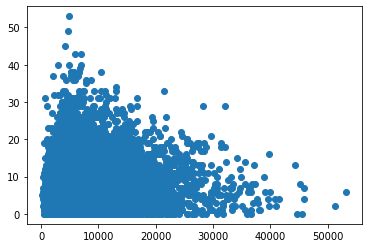

In [55]:
plt.scatter(study_df_pred['AVERAGE ALLOWED AMOUNT PER BENEFICIARY'], study_df_pred['H_TOT_DFCNCY']);

In [56]:
#There was one missing ownership value that I filled in by hand since I found the information elsewhere
study_df_pred['OWNERSHIP'].fillna(value='For profit - Corporation', inplace=True)
study_df_pred = study_df_pred.fillna(0)

In [57]:
study_df_pred.drop(columns = ['PROVNUM', 'ADDRESS','ZIP', 'CITY','COUNTY_NAME'], inplace = True)
study_df_pred = study_df_pred.set_index('PROVNAME')

In [58]:
#Would remove Medicare Columns
#study_df_pred.columns[study_df_pred.columns.str.contains('AVERAGE')]

In [59]:
#study_df_pred.drop(columns = study_df_pred.columns[study_df_pred.columns.str.contains('AVERAGE')], inplace=True)

In [60]:
#Categorizing data based on ownership

gov_owned = study_df[study_df['OWNERSHIP'].str.contains('Government')]
non_profit = study_df[study_df['OWNERSHIP'].str.contains('Non profit')]
for_profit = study_df[study_df['OWNERSHIP'].str.contains('For profit')]


#Double Checking to make sure I captured all categories
assert gov_owned.shape[0] + non_profit.shape[0] + for_profit.shape[0] == study_df.shape[0]

In [61]:
print('Average for Government Owned Facilities is:', gov_owned['H_TOT_DFCNCY'].mean())
print('Average for Non Profit Facilities is:', non_profit['H_TOT_DFCNCY'].mean())
print('Average for For Profit Owned Facilities is:', for_profit['H_TOT_DFCNCY'].mean())

Average for Government Owned Facilities is: 5.395543175487465
Average for Non Profit Facilities is: 5.06233303650935
Average for For Profit Owned Facilities is: 6.527151297200103


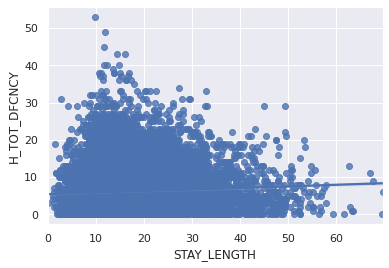

In [62]:
import seaborn as sns; sns.set_theme(color_codes=True)
ax = sns.regplot(x='STAY_LENGTH', y='H_TOT_DFCNCY', data=study_df_pred)

#II. Split Data (CONTINUED)

In [65]:
#Setting feature matrix and target vector
y = study_df_pred['H_TOT_DFCNCY']
X = study_df_pred.drop(columns='H_TOT_DFCNCY')

In [66]:
#Splitting into Test and Training Sets
mask = X['YEAR'] < 2018

X_train, y_train = X.loc[mask], y.loc[mask]
X_test, y_test = X.loc[~mask], y.loc[~mask]

In [79]:
study_df_pred['H_TOT_DFCNCY'].mean()

6.111255834147401

In [80]:
#FOR LOGISTIC MODEL

#Average = 6
study_log = study_df_pred
#1 = Above Average
#0 = Below Average

study_log['Above/Below Avg']= np.where(study_log['H_TOT_DFCNCY'] > 6, 1, 0)
study_log.drop(columns='H_TOT_DFCNCY', inplace=True)

In [88]:
y_l = study_log['Above/Below Avg']
X_l = study_log.drop(columns='Above/Below Avg')

In [89]:
mask = X_l['YEAR'] < 2018

X_l_train, y_l_train = X_l.loc[mask], y_l.loc[mask]
X_l_test, y_l_test = X_l.loc[~mask], y_l.loc[~mask]

#III. SET BASELINE

In [67]:
from sklearn.metrics import mean_absolute_error

In [68]:
#Linear Regression Model Baseline

y_pred = [y_train.mean()]*len(y_train)
print('Mean Number of Health Deficiencies:', y_train.mean())
print('Baseline MAE:', mean_absolute_error(y_train, y_pred))

Mean Number of Health Deficiencies: 5.841100954093611
Baseline MAE: 3.760130633278873


In [95]:
#Logistic Regression Model Baseline
y_l_test.value_counts(normalize=True)

print('Baseline for Logistic Regression Model is: 0.57')

0    0.565354
1    0.434646
Name: Above/Below Avg, dtype: float64

#IV. CREATE MODEL

In [98]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from scipy import stats

In [73]:
#Basic Linear Regression

model_lr = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    #SelectKBest(score_func=f_regression, k=15),
    LinearRegression()
)
model_lr.fit(X_train, y_train);

In [74]:
train_acc = model_lr.score(X_train, y_train)
test_acc = model_lr.score(X_test, y_test)
print(train_acc)
print(test_acc)

0.9868992928260931
0.1448166323687312


In [ ]:
#Linear R^2 Score of .144

In [66]:
# #Random Forrest Model

# model = make_pipeline(
#     OneHotEncoder(handle_unknown='ignore'),
#     RandomForestRegressor(verbose=2, n_estimators=32)
# )
# model.fit(X_train, y_train);

In [ ]:
# from sklearn.metrics import r2_score

# train_acc = model.score(X_train, y_train)
# test_acc = model.score(X_test, y_test)
# print(train_acc)
# print(test_acc)

In [ ]:
#Gradient Boosting Model
model_g = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    GradientBoostingRegressor(verbose=2, n_estimators=100, max_depth=7)
)
model_g.fit(X_train, y_train);

In [76]:
train_acc = model_g.score(X_train, y_train)
test_acc = model_g.score(X_test, y_test)
print(train_acc)
print(test_acc)

0.32385579408811593
0.118023007955249


In [91]:
#Basic Logistic Regression

model_lg = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    #SelectKBest(score_func=f_regression, k=15),
    LogisticRegression(max_iter=1000)
)
model_lg.fit(X_l_train, y_l_train);

In [97]:
print(model_lg.score(X_l_train, y_l_train))
print(model_lg.score(X_l_test, y_l_test))

0.9932064538688247
0.6576115485564304


In [105]:
#Random Forrest Model

model_rf_l = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    RandomForestClassifier(n_estimators=50, max_depth=10)
)
model_rf_l.fit(X_l_train, y_l_train);

In [106]:
print(model_rf_l.score(X_l_train, y_l_train));
print(model_rf_l.score(X_l_test, y_l_test));

0.991008541885209
0.6178477690288714


#Further Exloration of the Data

At this point, I was just looking to see if I could find any other trends with the data that would explain the difficulties modeling.

In [110]:
payments_percent.head(1)

,SNF VBP Ranking,Footnote -- SNF VBP Ranking,Provider Number (CCN),Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Baseline Period: FY 2017 Risk-Standardized Readmission Rate,Footnote -- Baseline Period: FY 2017 Risk-Standardized Readmission Rate,Performance Period: FY 2019 Risk-Standardized Readmission Rate,Footnote -- Performance Period: FY 2019 Risk-Standardized Readmission Rate,Achievement Score,Footnote – Achievement Score,Improvement Score,Footnote -- Improvement Score,Performance Score,Footnote -- Performance Score,Incentive Payment Multiplier,Footnote -- Incentive Payment Multiplier
0,1,NaN,15126,TRAYLOR RETIREMENT COMMUNITY,1235 YANCEY STREET P O BOX 467,ROANOKE,AL,36274,0.16754,NaN,0.16533,NaN,100.0,NaN,90.0,NaN,100.0,NaN,1.021305,NaN


In [122]:
min = payments_percent['Incentive Payment Multiplier'].min()
max = payments_percent['Incentive Payment Multiplier'].max()
print(min)
print(max)

0.9802783079999999
1.021304566


In [123]:
difference = max - min
print(difference)

#The difference percent is taken off of just 2% of the reimbursement amount
pay_percent = .02

0.04102625800000004


In [138]:
min_reimburse = 98 + min
max_reimburse = 98 + max
print(min_reimburse)
print(max_reimburse)

98.980278308
99.021304566


In [128]:
diff_tot_reim = max_reimburse - min_reimburse

In [135]:
min_mon = 1000 * (min_reimburse/100)

In [136]:
max_mon = 1000 * (max_reimburse/100)

In [139]:
print(min_mon)

989.8027830799999


In [140]:
print(max_mon)

990.21304566


In [137]:
max_mon - min_mon 

0.41026258000010785